In [ ]:
import sys
from google.colab import drive
drive.mount('/content/gdrive', force_remount=True)
sys.path.append('/content/gdrive/My Drive/Colab Notebooks')
%autosave 1

Mounted at /content/gdrive


Autosaving every 1 seconds


In [ ]:
from tensorflow.python.client import device_lib
print(device_lib.list_local_devices())

[name: "/device:CPU:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 13760219029651435805
xla_global_id: -1
, name: "/device:GPU:0"
device_type: "GPU"
memory_limit: 11320098816
locality {
  bus_id: 1
  links {
  }
}
incarnation: 6756558088987514560
physical_device_desc: "device: 0, name: Tesla K80, pci bus id: 0000:00:04.0, compute capability: 3.7"
xla_global_id: 416903419
]


In [ ]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore")

In [ ]:
raw = pd.read_csv('/content/gdrive/MyDrive/Datasets/WA_Fn-UseC_-Telco-Customer-Churn.csv')
raw

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


In [ ]:
from random import randint
raw.iloc[randint(1,len(raw))]

customerID                   3082-WQRVY
gender                             Male
SeniorCitizen                         1
Partner                             Yes
Dependents                           No
tenure                               14
PhoneService                        Yes
MultipleLines                        No
InternetService                      No
OnlineSecurity      No internet service
OnlineBackup        No internet service
DeviceProtection    No internet service
TechSupport         No internet service
StreamingTV         No internet service
StreamingMovies     No internet service
Contract                       One year
PaperlessBilling                     No
PaymentMethod              Mailed check
MonthlyCharges                    19.65
TotalCharges                     228.65
Churn                                No
Name: 1139, dtype: object

In [ ]:
raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [ ]:
raw.TotalCharges = pd.to_numeric(raw.TotalCharges, errors='coerce')

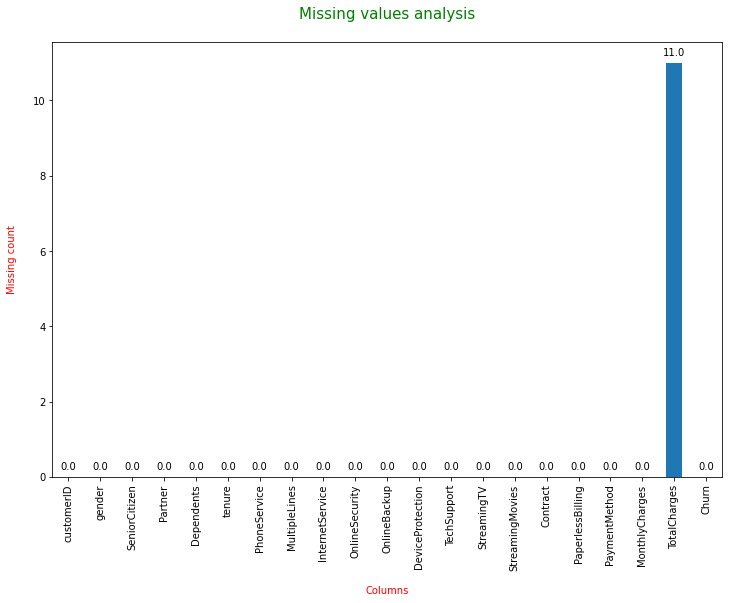

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

freq_series = raw.isnull().sum()

#x_labels = [108300.0, 110540.0, 112780.0, 115020.0, 117260.0, 119500.0,
#            121740.0, 123980.0, 126220.0, 128460.0, 130700.0]

# Plot the figure.

plt.figure(figsize=(12, 8))
ax = freq_series.plot(kind='bar')
ax.set_title('Missing values analysis\n',color='green',fontsize=15)
ax.set_xlabel('\nColumns',color='red')
ax.set_ylabel('Missing count\n',color='red')
#ax.set_xticklabels(x_labels)


def add_value_labels(ax, spacing=5):
    """Add labels to the end of each bar in a bar chart.

    Arguments:
        ax (matplotlib.axes.Axes): The matplotlib object containing the axes
            of the plot to annotate.
        spacing (int): The distance between the labels and the bars.
    """

    # For each bar: Place a label
    for rect in ax.patches:
        # Get X and Y placement of label from rect.
        y_value = rect.get_height()
        x_value = rect.get_x() + rect.get_width() / 2

        # Number of points between bar and label. Change to your liking.
        space = spacing
        # Vertical alignment for positive values
        va = 'bottom'

        # If value of bar is negative: Place label below bar
        if y_value < 0:
            # Invert space to place label below
            space *= -1
            # Vertically align label at top
            va = 'top'

        # Use Y value as label and format number with one decimal place
        label = "{:.1f}".format(y_value)

        # Create annotation
        ax.annotate(
            label,                      # Use `label` as label
            (x_value, y_value),         # Place label at end of the bar
            xytext=(0, space),          # Vertically shift label by `space`
            textcoords="offset points", # Interpret `xytext` as offset in points
            ha='center',                # Horizontally center label
            va=va)                      # Vertically align label differently for
                                        # positive and negative values.


# Call the function above. All the magic happens there.
add_value_labels(ax)

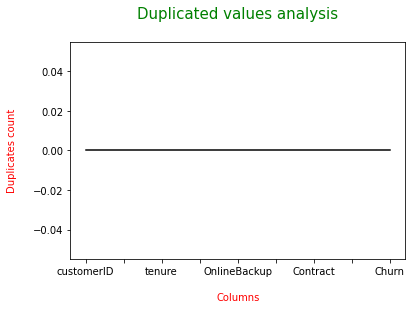

In [ ]:
raw[raw.duplicated()].sum().plot(kind='line',color='black');
plt.xlabel('\nColumns',color='red')
plt.ylabel('Duplicates count\n',color='red')
plt.title('Duplicated values analysis\n',color='green',fontsize=15)
plt.show()

In [ ]:
raw.drop('customerID',axis=1,inplace=True)

In [ ]:
raw.dropna(inplace=True)

In [ ]:
raw

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.50,No
7039,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.90,No
7040,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.60,Yes


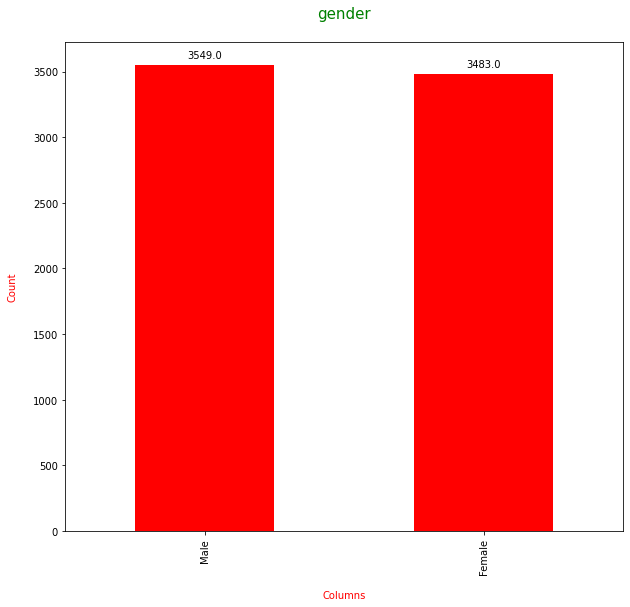


----------------------------------------------------------------------------------------------------


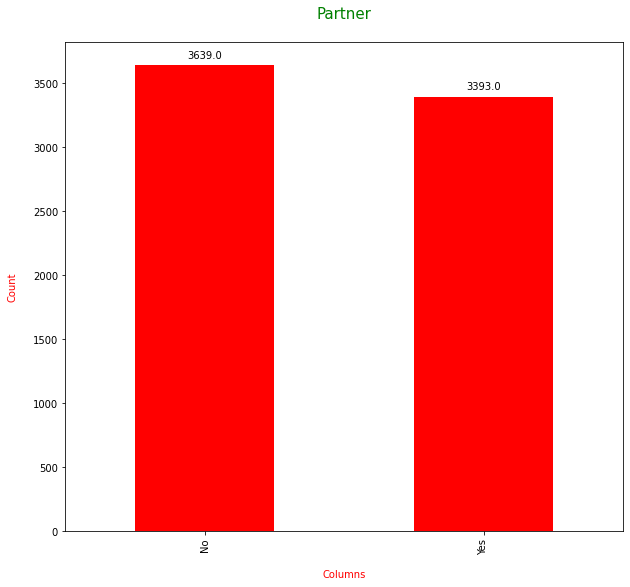


----------------------------------------------------------------------------------------------------


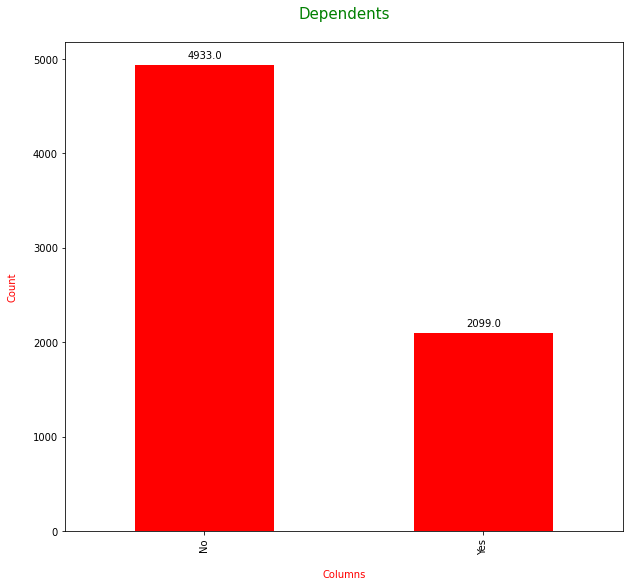


----------------------------------------------------------------------------------------------------


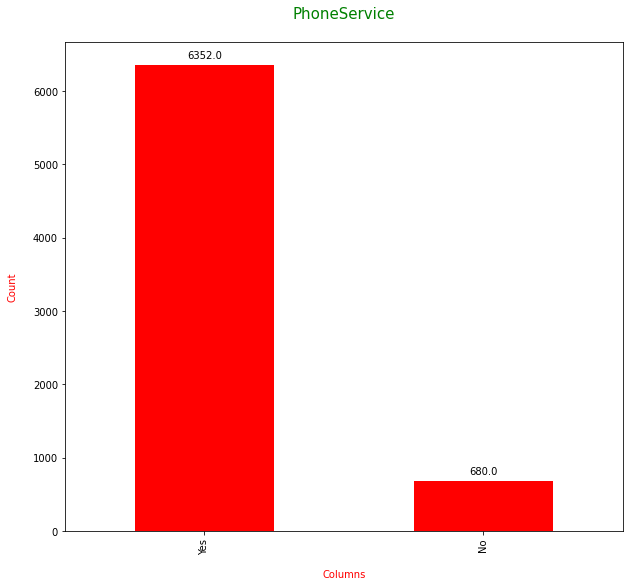


----------------------------------------------------------------------------------------------------


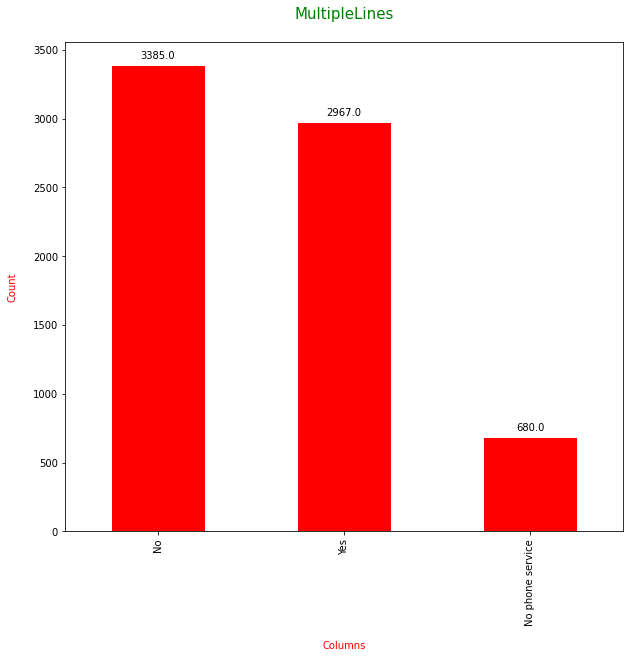


----------------------------------------------------------------------------------------------------


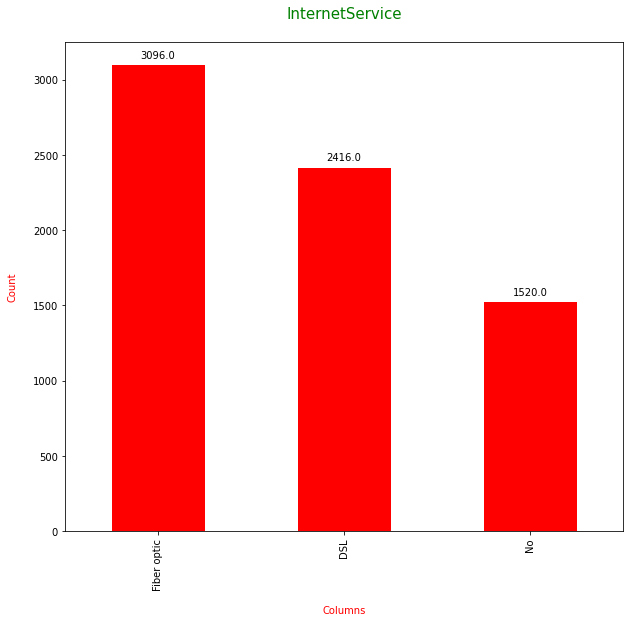


----------------------------------------------------------------------------------------------------


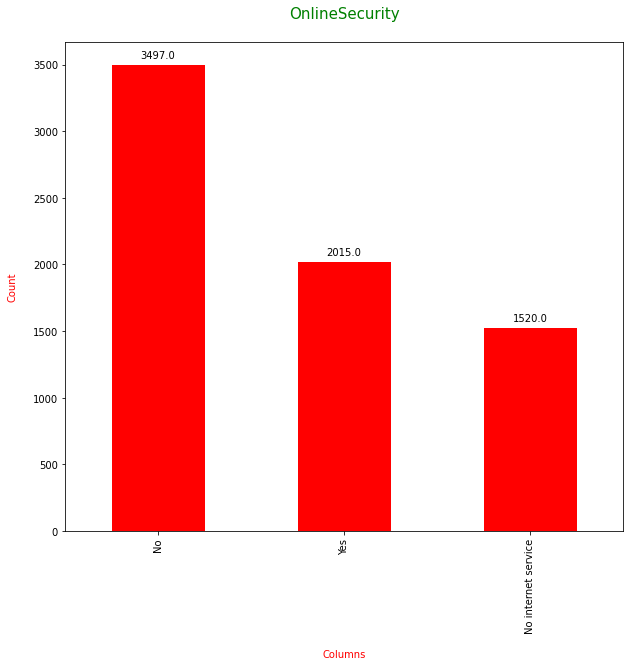


----------------------------------------------------------------------------------------------------


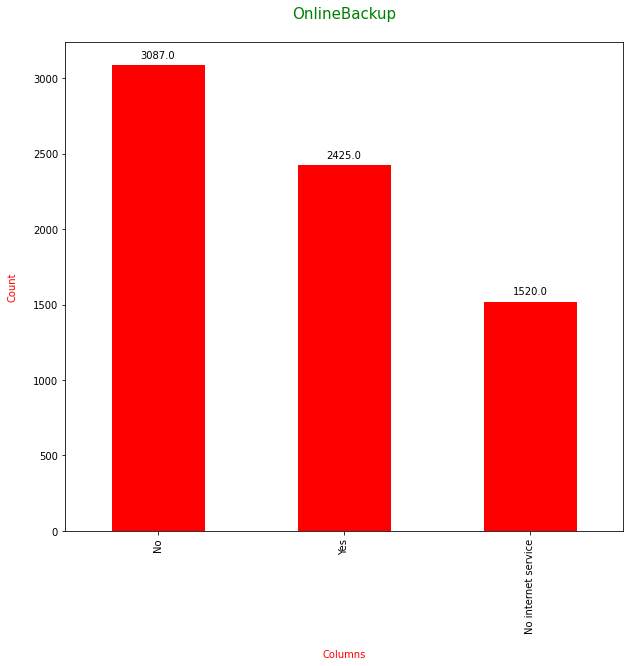


----------------------------------------------------------------------------------------------------


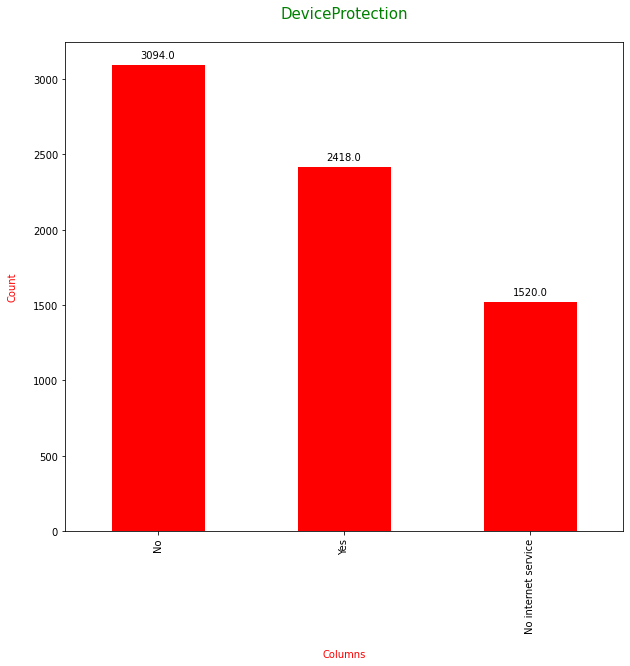


----------------------------------------------------------------------------------------------------


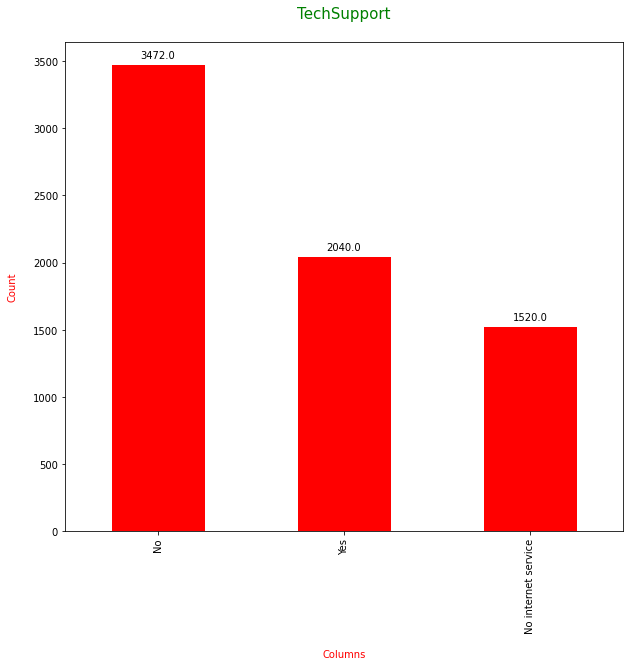


----------------------------------------------------------------------------------------------------


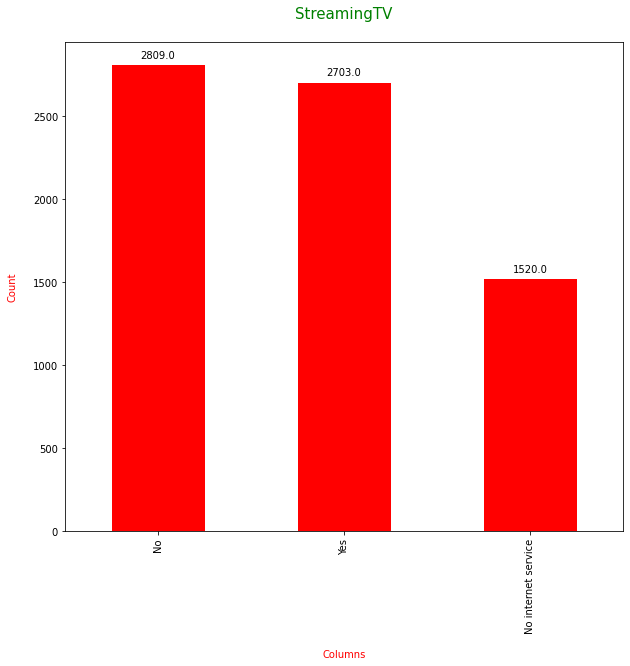


----------------------------------------------------------------------------------------------------


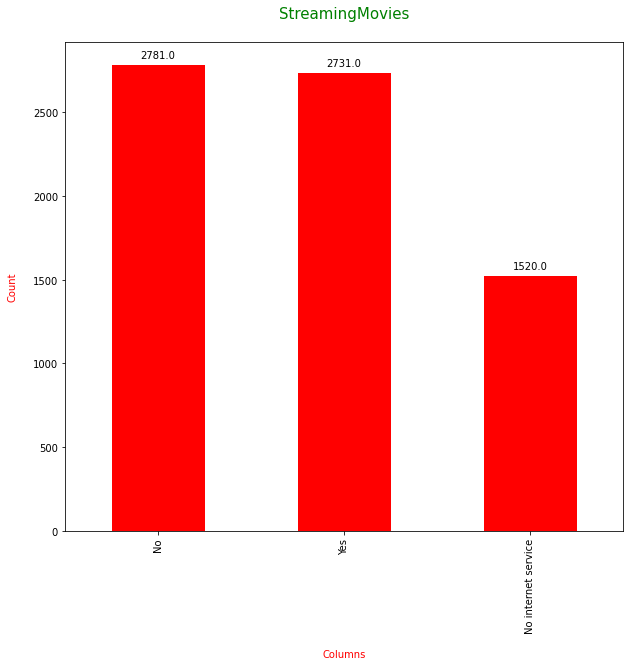


----------------------------------------------------------------------------------------------------


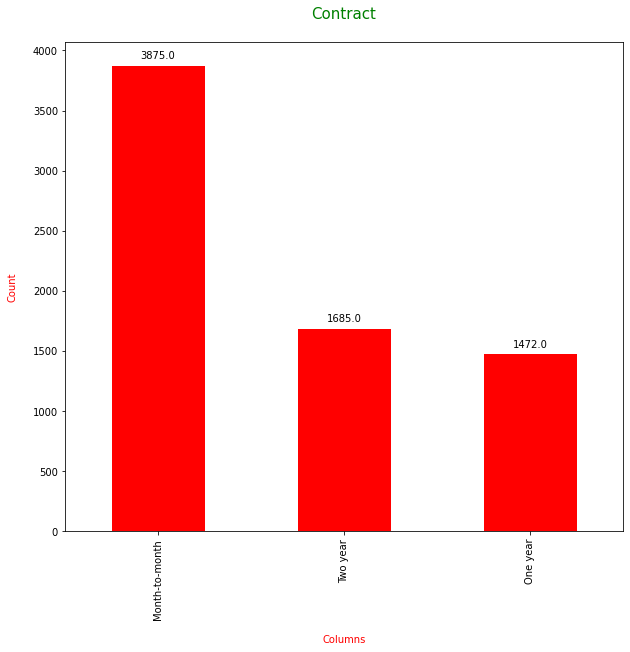


----------------------------------------------------------------------------------------------------


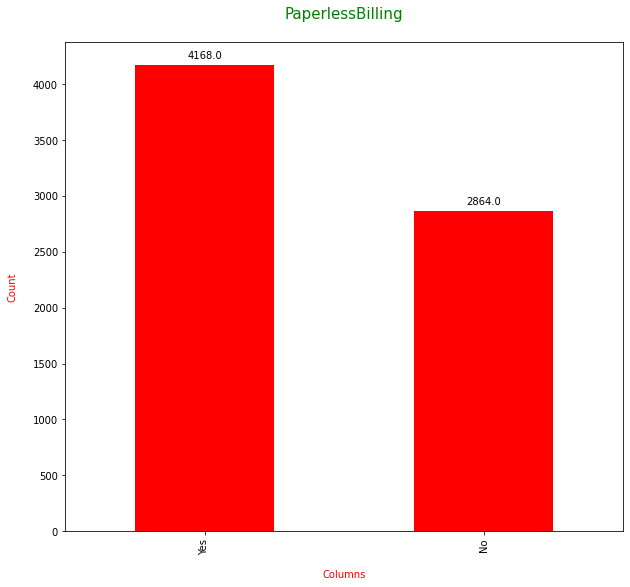


----------------------------------------------------------------------------------------------------


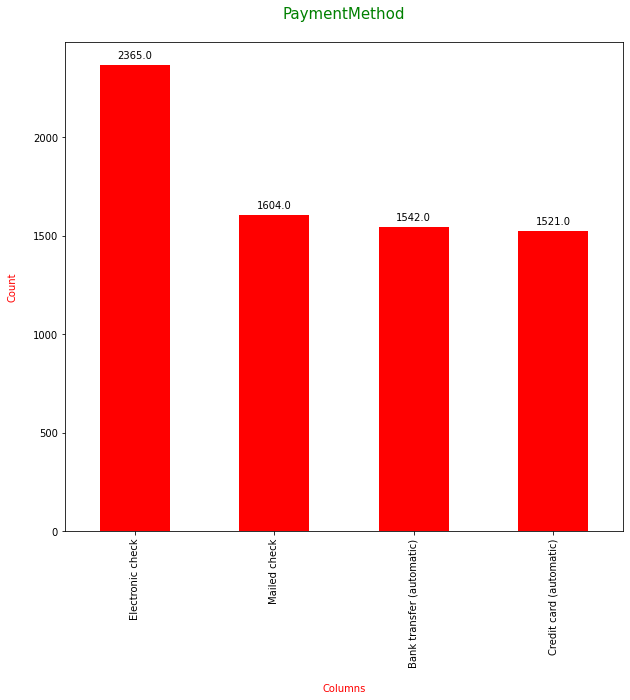


----------------------------------------------------------------------------------------------------


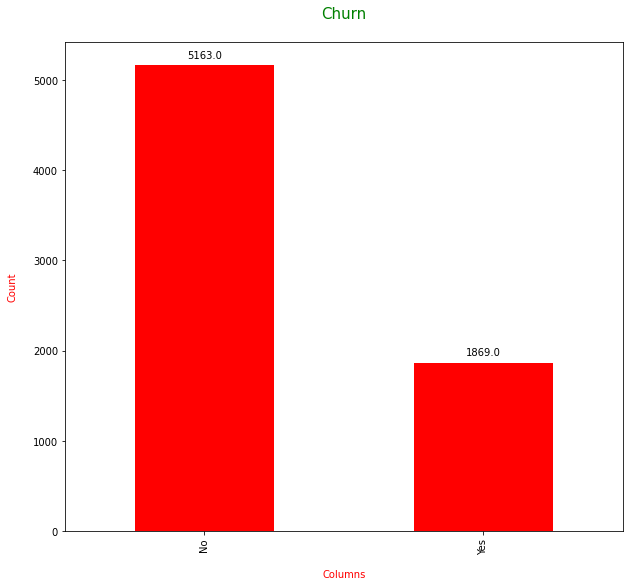


----------------------------------------------------------------------------------------------------


In [ ]:
for k,v in raw.dtypes[raw.dtypes == 'object'].items():
        ax = raw[k].value_counts().plot(kind='bar',color='red',figsize=(10,9))
        add_value_labels(ax)
        plt.xlabel('\nColumns',color='red')
        plt.ylabel('Count\n',color='red')
        plt.title(f'{k}\n',color='green',fontsize=15)
        plt.show()
        print()
        print('-'*100)

In [ ]:
encode=[]
for obj in raw.columns:
    if raw[obj].dtypes == 'object':
        encode.append(obj)

In [ ]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
for en in encode:
    raw[en]=le.fit_transform(raw[en])

In [ ]:
raw

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,0,1,0,1,0,1,0,0,2,0,0,0,0,0,1,2,29.85,29.85,0
1,1,0,0,0,34,1,0,0,2,0,2,0,0,0,1,0,3,56.95,1889.50,0
2,1,0,0,0,2,1,0,0,2,2,0,0,0,0,0,1,3,53.85,108.15,1
3,1,0,0,0,45,0,1,0,2,0,2,2,0,0,1,0,0,42.30,1840.75,0
4,0,0,0,0,2,1,0,1,0,0,0,0,0,0,0,1,2,70.70,151.65,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,1,0,1,1,24,1,2,0,2,0,2,2,2,2,1,1,3,84.80,1990.50,0
7039,0,0,1,1,72,1,2,1,0,2,2,0,2,2,1,1,1,103.20,7362.90,0
7040,0,0,1,1,11,0,1,0,2,0,0,0,0,0,0,1,2,29.60,346.45,0
7041,1,1,1,0,4,1,2,1,0,0,0,0,0,0,0,1,3,74.40,306.60,1


In [ ]:
learning_onehot=raw

In [ ]:
from scipy import stats
for x in range (100):
    raw_clean = learning_onehot[(np.abs(stats.zscore(learning_onehot)) < 3).all(axis=1)]

raw_clean = raw_clean.reset_index(drop=True)
raw_clean

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,1,0,0,0,34,1,0,0,2,0,2,0,0,0,1,0,3,56.95,1889.50,0
1,1,0,0,0,2,1,0,0,2,2,0,0,0,0,0,1,3,53.85,108.15,1
2,0,0,0,0,2,1,0,1,0,0,0,0,0,0,0,1,2,70.70,151.65,1
3,0,0,0,0,8,1,2,1,0,0,2,0,2,2,0,1,2,99.65,820.50,1
4,1,0,0,1,22,1,2,1,0,2,0,0,2,0,0,1,1,89.10,1949.40,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6347,0,0,0,0,72,1,0,2,1,1,1,1,1,1,2,1,0,21.15,1419.40,0
6348,1,0,1,1,24,1,2,0,2,0,2,2,2,2,1,1,3,84.80,1990.50,0
6349,0,0,1,1,72,1,2,1,0,2,2,0,2,2,1,1,1,103.20,7362.90,0
6350,1,1,1,0,4,1,2,1,0,0,0,0,0,0,0,1,3,74.40,306.60,1


In [ ]:
raw_clean.Churn.value_counts()

0    4653
1    1699
Name: Churn, dtype: int64

In [ ]:
one = raw_clean[raw_clean['Churn'] == 1]
one.shape

(1699, 20)

In [ ]:
zero = raw_clean[raw_clean['Churn'] == 0]
zero.shape

(4653, 20)

In [ ]:
zeros = zero.sample(len(one),random_state=71)
data = pd.concat([one,zeros])
data["Churn"].value_counts()

1    1699
0    1699
Name: Churn, dtype: int64

In [ ]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler
scaler=MinMaxScaler()
#standardscaler gives zero accuracy
#scaler=StandardScaler()
dataset = pd.DataFrame(scaler.fit_transform(data),columns = data.columns)
dataset

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,1.0,0.0,0.0,0.0,0.014085,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.000000,0.351324,0.010305,1.0
1,0.0,0.0,0.0,0.0,0.014085,0.0,0.0,0.5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.666667,0.519740,0.015324,1.0
2,0.0,0.0,0.0,0.0,0.098592,0.0,1.0,0.5,0.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.666667,0.809095,0.092506,1.0
3,0.0,0.0,1.0,0.0,0.380282,0.0,1.0,0.5,0.0,0.0,1.0,1.0,1.0,1.0,0.0,1.0,0.666667,0.860570,0.349321,1.0
4,1.0,0.0,0.0,0.0,0.676056,0.0,1.0,0.5,0.0,1.0,1.0,0.0,1.0,1.0,0.0,1.0,0.000000,0.849575,0.578984,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3393,0.0,0.0,1.0,0.0,0.422535,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.5,1.0,0.666667,0.452774,0.218314,0.0
3394,0.0,0.0,1.0,0.0,0.126761,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.333333,0.490755,0.073195,0.0
3395,1.0,0.0,1.0,1.0,0.732394,0.0,0.0,0.5,0.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,0.666667,0.738131,0.549345,0.0
3396,1.0,0.0,0.0,0.0,0.352113,0.0,0.0,1.0,0.5,0.5,0.5,0.5,0.5,0.5,0.5,1.0,0.333333,0.019490,0.066542,0.0


In [ ]:
x = dataset.drop(columns=["Churn",'PhoneService'])
y = dataset["Churn"]

In [ ]:
x

,gender,SeniorCitizen,Partner,Dependents,tenure,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
0,1.0,0.0,0.0,0.0,0.014085,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.000000,0.351324,0.010305
1,0.0,0.0,0.0,0.0,0.014085,0.0,0.5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.666667,0.519740,0.015324
2,0.0,0.0,0.0,0.0,0.098592,1.0,0.5,0.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.666667,0.809095,0.092506
3,0.0,0.0,1.0,0.0,0.380282,1.0,0.5,0.0,0.0,1.0,1.0,1.0,1.0,0.0,1.0,0.666667,0.860570,0.349321
4,1.0,0.0,0.0,0.0,0.676056,1.0,0.5,0.0,1.0,1.0,0.0,1.0,1.0,0.0,1.0,0.000000,0.849575,0.578984
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3393,0.0,0.0,1.0,0.0,0.422535,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.5,1.0,0.666667,0.452774,0.218314
3394,0.0,0.0,1.0,0.0,0.126761,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.333333,0.490755,0.073195
3395,1.0,0.0,1.0,1.0,0.732394,0.0,0.5,0.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,0.666667,0.738131,0.549345
3396,1.0,0.0,0.0,0.0,0.352113,0.0,1.0,0.5,0.5,0.5,0.5,0.5,0.5,0.5,1.0,0.333333,0.019490,0.066542


In [ ]:
y[y>.5]

0       1.0
1       1.0
2       1.0
3       1.0
4       1.0
       ... 
1694    1.0
1695    1.0
1696    1.0
1697    1.0
1698    1.0
Name: Churn, Length: 1699, dtype: float64

In [ ]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2,random_state = 42,stratify=y)

In [ ]:
from sklearn.feature_selection import mutual_info_classif

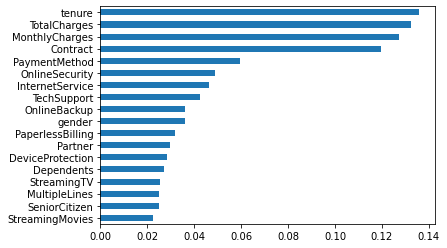

In [ ]:
from sklearn.ensemble import ExtraTreesClassifier
tree=ExtraTreesClassifier()
tree.fit(x,y)
tree_feature = pd.Series(tree.feature_importances_,index=x.columns).sort_values()
tree_feature.plot(kind='barh')
plt.show()

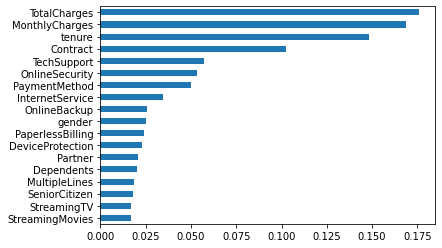

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()
rf.fit(x,y)
rf_feature = pd.Series(rf.feature_importances_,index=x.columns).sort_values()
rf_feature.plot(kind='barh')
plt.show()

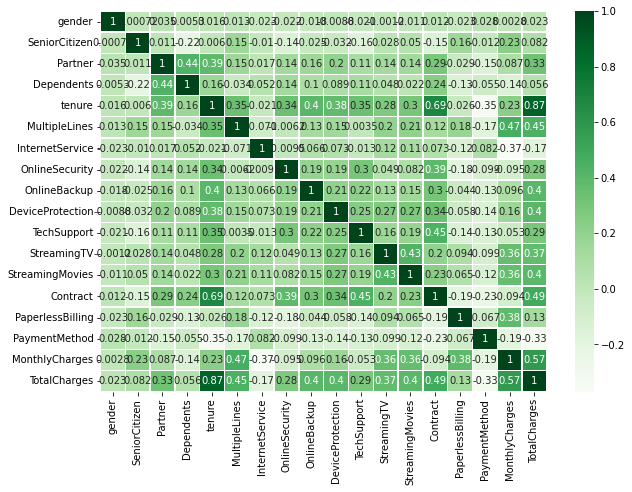

In [ ]:
import seaborn as sns
plt.figure(figsize=(10, 7))  #width x height
p = sns.heatmap(x_train.corr(), annot=True, cmap='Greens', linewidths=.5)

In [ ]:
# with the following function we can select highly correlated features
# it will remove the first feature that is correlated with anything other feature

def correlation(dataset, threshold):
    col_corr = set()  # Set of all the names of correlated columns
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i, j]) > threshold: # we are interested in absolute coeff value
                colname = corr_matrix.columns[i]  # getting the name of column
                col_corr.add(colname)
    return col_corr

In [ ]:
percentage = 85
corr_features = correlation(x_train,percentage/100)
print(f"{percentage}% corr_features are\n{corr_features}\n")
print(f"So there are {len(set(corr_features))} corr_features")

85% corr_features are
{'TotalCharges'}

So there are 1 corr_features


In [ ]:
import tensorflow as tf
from tensorflow import keras
from keras.layers import Dense,Flatten
from keras import Sequential

In [ ]:
import keras_tuner as kt

In [ ]:
def build_model(hp):

  input = len(x.columns)

  model = keras.Sequential()

  model.add(keras.layers.Flatten(input_shape=(input,)))

  for i in range(hp.Int('num_layers',2,21)):
    model.add(keras.layers.Dense(units=hp.Int('units_' + str(i),min_value=64,max_value=3200,step=64),
                                activation=hp.Choice('act_' + str(i),['relu', 'tanh']))),
    keras.layers.Dropout(0.5),

  model.add(keras.layers.Dense(32, activation='sigmoid')),
  model.add(keras.layers.Dropout(0.5)),
  model.add(keras.layers.Dense(1, activation='sigmoid'))

  model.compile(optimizer=keras.optimizers.Adam(hp.Choice('learning_rate', [1.0,1e-1,1e-2, 1e-3])),
                loss='binary_crossentropy',
                metrics=['accuracy'])

  return model

In [ ]:
tuner = kt.RandomSearch(
    build_model,
    objective='val_accuracy',
    #found: dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])
    max_trials=10,
    executions_per_trial=5,
    directory='project_00')

In [ ]:
stop_early = tf.keras.callbacks.EarlyStopping(monitor='val_accuracy', patience=10)
tuner.search(x_train, y_train,
             epochs=200,
             validation_data=(x_test, y_test),
             use_multiprocessing=True,batch_size=1000000, verbose=True,workers=-1,callbacks=[stop_early]
             )

Trial 10 Complete [00h 00m 35s]
val_accuracy: 0.502647054195404

Best val_accuracy So Far: 0.7708823680877686
Total elapsed time: 00h 05m 22s
INFO:tensorflow:Oracle triggered exit


In [ ]:
best_model = tuner.get_best_models()[0]

In [ ]:
print('training accuracy')
best_model.evaluate(x_train,y_train)
print('test accuracy')
best_model.evaluate(x_test,y_test)

training accuracy
85/85 [==============================] - 1s 8ms/step - loss: 0.5480 - accuracy: 0.7553
test accuracy
22/22 [==============================] - 0s 8ms/step - loss: 0.5313 - accuracy: 0.7794


[0.5312758088111877, 0.779411792755127]

In [ ]:
stop_fun = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=50)

In [ ]:
history = best_model.fit(x_train, y_train, epochs=202,use_multiprocessing=True,batch_size=1000000, verbose=True,workers=-1,validation_split=.2)

Epoch 1/202
1/1 [==============================] - 1s 1s/step - loss: 0.5661 - accuracy: 0.7534 - val_loss: 0.5529 - val_accuracy: 0.7500
Epoch 2/202
1/1 [==============================] - 0s 294ms/step - loss: 0.5577 - accuracy: 0.7562 - val_loss: 0.5521 - val_accuracy: 0.7482
Epoch 3/202
1/1 [==============================] - 0s 287ms/step - loss: 0.5590 - accuracy: 0.7534 - val_loss: 0.5473 - val_accuracy: 0.7445
Epoch 4/202
1/1 [==============================] - 0s 314ms/step - loss: 0.5468 - accuracy: 0.7585 - val_loss: 0.5390 - val_accuracy: 0.7426
Epoch 5/202
1/1 [==============================] - 0s 276ms/step - loss: 0.5420 - accuracy: 0.7571 - val_loss: 0.5384 - val_accuracy: 0.7482
Epoch 6/202
1/1 [==============================] - 0s 314ms/step - loss: 0.5399 - accuracy: 0.7599 - val_loss: 0.5803 - val_accuracy: 0.7482
Epoch 7/202
1/1 [==============================] - 0s 271ms/step - loss: 0.5813 - accuracy: 0.7622 - val_loss: 0.5468 - val_accuracy: 0.7518
Epoch 8/202
1/1 

In [ ]:
best_model.evaluate(x_train,y_train)

85/85 [==============================] - 1s 7ms/step - loss: 0.4335 - accuracy: 0.8249


[0.4334677755832672, 0.8248712420463562]

In [ ]:
best_model.evaluate(x_test,y_test)

22/22 [==============================] - 0s 7ms/step - loss: 0.5489 - accuracy: 0.7603


[0.5488593578338623, 0.7602941393852234]

In [ ]:
num = history.history['val_accuracy'].index(max(history.history['val_accuracy']))
num

126

In [ ]:
max(history.history['val_accuracy'])

0.7665441036224365

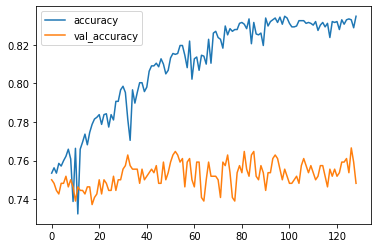

In [ ]:
plt.plot(history.history['accuracy'][:num+3],label='accuracy')
plt.plot(history.history['val_accuracy'][:num+3],label='val_accuracy')
plt.legend()
plt.show()

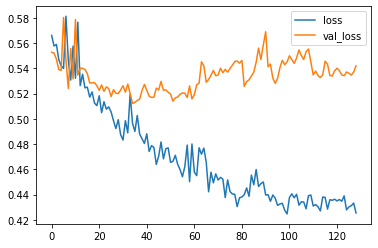

In [ ]:
plt.plot(history.history['loss'][:num+3],label='loss')
plt.plot(history.history['val_loss'][:num+3],label='val_loss')
plt.legend()
plt.show()

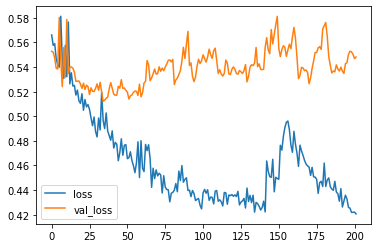

In [ ]:
plt.plot(history.history['loss'][:],label='loss')
plt.plot(history.history['val_loss'][:],label='val_loss')
plt.legend()
plt.show()

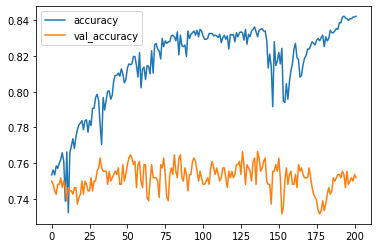

In [ ]:
plt.plot(history.history['accuracy'],label='accuracy')
plt.plot(history.history['val_accuracy'],label='val_accuracy')
plt.legend()
plt.show()

In [ ]:
%%time
pred =best_model.predict(x_train)

CPU times: user 687 ms, sys: 18.4 ms, total: 705 ms
Wall time: 806 ms


In [ ]:
y_pred=[]

for s in pred:
    if s>=.5 :
        y_pred.append(1)
    else:
        y_pred.append(0)

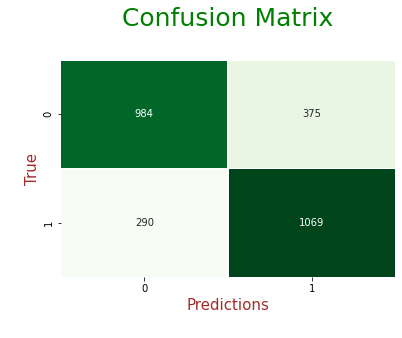

In [ ]:
from sklearn.metrics import confusion_matrix
confusion_matrix = pd.DataFrame(confusion_matrix(y_train, y_pred))
import seaborn as sns
sns.heatmap(confusion_matrix,annot=True, fmt="d",linewidths=.5,cmap="Greens",cbar=False);
plt.ylabel("\nTrue",fontsize=15,color='brown')
plt.xlabel("Predictions\n",fontsize=15,color='brown')
plt.title("Confusion Matrix\n",fontsize=25,color='green')
plt.show()

In [ ]:
from sklearn.metrics import confusion_matrix , classification_report

print(classification_report(y_train,y_pred))

              precision    recall  f1-score   support

         0.0       0.77      0.72      0.75      1359
         1.0       0.74      0.79      0.76      1359

    accuracy                           0.76      2718
   macro avg       0.76      0.76      0.76      2718
weighted avg       0.76      0.76      0.76      2718



In [ ]:
%%time
predictions =best_model.predict(x_test)

CPU times: user 177 ms, sys: 13.2 ms, total: 190 ms
Wall time: 211 ms


In [ ]:
y_predictions=[]

for k in predictions:
    if k>=.5 :
        y_predictions.append(1)
    else:
        y_predictions.append(0)

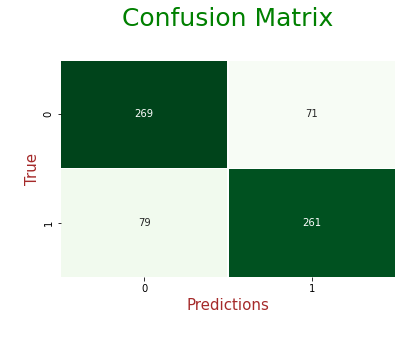

In [ ]:
from sklearn.metrics import confusion_matrix
confusion_matrix = pd.DataFrame(confusion_matrix(y_test, y_predictions))
import seaborn as sns
sns.heatmap(confusion_matrix,annot=True, fmt="d",linewidths=.5,cmap="Greens",cbar=False);
plt.ylabel("\nTrue",fontsize=15,color='brown')
plt.xlabel("Predictions\n",fontsize=15,color='brown')
plt.title("Confusion Matrix\n",fontsize=25,color='green')
plt.show()

In [ ]:
from sklearn.metrics import confusion_matrix , classification_report

print(classification_report(y_test,y_predictions))

              precision    recall  f1-score   support

         0.0       0.77      0.79      0.78       340
         1.0       0.79      0.77      0.78       340

    accuracy                           0.78       680
   macro avg       0.78      0.78      0.78       680
weighted avg       0.78      0.78      0.78       680

